In [113]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  

EPH2025 = pd.read_excel(r"C:\Users\Isabella\Downloads\usu_individual_T125.xlsx")

EPH2005 = pd.read_stata(r"C:\Users\Isabella\Downloads\Individual_t105.dta")

print(EPH2025.head())
print(EPH2005.head())

#Vamos a ver por cada región cuántos datos hay para poder elegir

# 2025
conteo_2025 = EPH2025['REGION'].value_counts()
print("2025",conteo_2025)

# 2005
conteo_2005 = EPH2005['region'].value_counts()
print("2005",conteo_2005)

                          CODUSU  ANO4  TRIMESTRE  NRO_HOGAR  COMPONENTE  H15  \
0  TQRMNOVQVHJOLOCDEFKID00875778  2025          1          1           2    1   
1  TQRMNOVQVHJOLOCDEFKID00875778  2025          1          1           3    0   
2  TQRMNOVQVHJOLOCDEFKID00875778  2025          1          1           4    0   
3  TQRMNOVQVHJOLOCDEFKID00875778  2025          1          1           5    0   
4  TQRMNOUPQHLOLOCDEFKID00851757  2025          1          1           1    1   

   REGION MAS_500  AGLOMERADO  PONDERA  ...  V21_03_M  V22_01_M V22_02_M  \
0      43       S           4      927  ...         0         0        0   
1      43       S           4      927  ...         0         0        0   
2      43       S           4      927  ...         0         0        0   
3      43       S           4      927  ...         0         0        0   
4      43       S           4     1294  ...         0         0        0   

   V22_03_M  P_DECCF  P_RDECCF  P_GDECCF  P_PDECCF  P_ID

In [115]:
#1.a

# Como nombraron distinto a las regiones en los dos años, vemos como se llaman así filtramos bien
print(EPH2025['REGION'].unique())
#está como 43

# Lo mismo para 2005
print(EPH2005['region'].unique())
#está como Pampeana

#nos aseguramos que estén las dos en minúsculas para poder unir las bases
EPH2025.columns = EPH2025.columns.str.lower()
EPH2005.columns = EPH2005.columns.str.lower()

#nos quedamos solo con pampeana
# Filtrar Región Pampeana en 2005
EPH2005_pampeana = EPH2005[EPH2005['region'] == 'Pampeana'].copy()

# Filtrar Región Pampeana en 2025 (código 43)
EPH2025_pampeana = EPH2025[EPH2025['region'] == 43].copy()

# Agregar columna 'anio' para diferenciar
EPH2005_pampeana['anio'] = 2005
EPH2025_pampeana['anio'] = 2025

# Unimos pampeana de las dos años
EPH_total = pd.concat([EPH2005_pampeana, EPH2025_pampeana], ignore_index=True)

[43 41 42 40 44  1]
['Gran Buenos Aires', 'NOA', 'NEA', 'Cuyo', 'Pampeana', 'Patagónica']
Categories (6, object): ['Gran Buenos Aires' < 'NOA' < 'NEA' < 'Cuyo' < 'Pampeana' < 'Patagónica']


In [116]:
#1.b

#guardamos las variables con las que nos quedamos en esta lista
variables = [
   "region", "ch04", "ch06", "ch07", "ch08", "nivel_ed", "estado",
    "cat_inac", "ipcf", "ch09", "cat_ocup",  
    "ch15", "itf",  "ch03", "p47t", "p21"
]

EPH2005_filtrado = EPH2005[variables]

EPH2025_filtrado = EPH2025[variables]

In [117]:
EPH2005_filtrado.head(10)

,region,ch04,ch06,ch07,ch08,nivel_ed,estado,cat_inac,ipcf,ch09,cat_ocup,ch15,itf,ch03,p47t,p21
0,Gran Buenos Aires,Varón,80.0,Viudo,Obra social (incluye PAMI),Secundaria Incompleta,Inactivo,Jubilado/pensionado,583.0,Sí,0.0,En esta localidad,583.0,Jefe,583.0,0.0
1,Gran Buenos Aires,Varón,26.0,Casado,No paga ni le descuentan,Secundaria Completa,Ocupado,0.0,150.0,Sí,Cuenta propia,En otra localidad,450.0,Jefe,450.0,300.0
2,Gran Buenos Aires,Mujer,27.0,Casado,No paga ni le descuentan,Superior Universitaria Completa,Inactivo,Ama de casa,150.0,Sí,0.0,En esta localidad,450.0,Cónyuge/Pareja,0.0,0.0
3,Gran Buenos Aires,Mujer,Menos de 1 año,Soltero,No paga ni le descuentan,Sin instrucción,Menor de 10 años,Menor de 6 años,150.0,Menor de 2 años,0.0,En esta localidad,450.0,Hijo/Hijastro,0.0,0.0
4,Gran Buenos Aires,Mujer,71.0,Viudo,Obra social (incluye PAMI),Primaria Completa,Inactivo,Jubilado/pensionado,855.0,Sí,0.0,En esta localidad,855.0,Jefe,855.0,0.0
5,Gran Buenos Aires,Varón,54.0,Casado,Obra social (incluye PAMI),Secundaria Completa,Ocupado,0.0,1016.0,Sí,Cuenta propia,En esta localidad,5080.0,Jefe,5000.0,5000.0
6,Gran Buenos Aires,Mujer,54.0,Casado,Obra social (incluye PAMI),Secundaria Completa,Inactivo,Ama de casa,1016.0,Sí,0.0,En esta localidad,5080.0,Cónyuge/Pareja,0.0,0.0
7,Gran Buenos Aires,Mujer,27.0,Soltero,Obra social (incluye PAMI),Secundaria Completa,Inactivo,Otros,1016.0,Sí,0.0,En esta localidad,5080.0,Hijo/Hijastro,0.0,0.0
8,Gran Buenos Aires,Varón,20.0,Soltero,Obra social (incluye PAMI),Secundaria Incompleta,Desocupado,0.0,1016.0,Sí,Obrero o empleado,En esta localidad,5080.0,Hijo/Hijastro,80.0,0.0
9,Gran Buenos Aires,Mujer,18.0,Soltero,Obra social (incluye PAMI),Superior Universitaria Incompleta,Inactivo,Estudiante,1016.0,Sí,0.0,En esta localidad,5080.0,Hijo/Hijastro,0.0,0.0


In [129]:
EPH2005["cat_inac"].unique()

['Jubilado/pensionado', 0.0, 'Ama de casa', 'Menor de 6 años', 'Otros', 'Estudiante', 'Rentista', 'Discapacitado']
Categories (8, object): [0.0 < 'Jubilado/pensionado' < 'Rentista' < 'Estudiante' < 'Ama de casa' < 'Menor de 6 años' < 'Discapacitado' < 'Otros']

In [119]:
EPH2025_filtrado.head(10)

,region,ch04,ch06,ch07,ch08,nivel_ed,estado,cat_inac,ipcf,ch09,cat_ocup,ch15,itf,ch03,p47t,p21
0,43,2,25,1,4.0,4,1,0,205600.0,1,3,1,1028000,2,628000.0,200000
1,43,2,7,5,4.0,1,4,3,205600.0,1,0,1,1028000,3,0.0,0
2,43,1,4,5,4.0,7,4,5,205600.0,2,0,1,1028000,3,0.0,0
3,43,1,-1,5,4.0,7,4,5,205600.0,3,0,1,1028000,3,0.0,0
4,43,2,29,5,4.0,5,1,0,230000.0,1,2,1,690000,1,690000.0,400000
5,43,2,13,5,4.0,1,3,3,230000.0,1,0,1,690000,3,0.0,0
6,43,1,5,5,4.0,7,4,5,230000.0,2,0,1,690000,3,0.0,0
7,43,2,39,1,1.0,6,1,0,350000.0,1,3,1,1050000,1,800000.0,800000
8,43,1,41,1,1.0,3,1,0,350000.0,1,3,1,1050000,2,250000.0,250000
9,43,2,2,5,1.0,7,4,5,350000.0,2,0,1,1050000,3,0.0,0


In [120]:
#vemos el tipo de datos que hay en cada año
print(EPH2005_filtrado.dtypes)
print(EPH2025_filtrado.dtypes)

#despues de esto vemos que mientras tenemos variables category en 2005, en 2025 están en int64 o float64, vamos a poner todo en un mismo formato

region      category
ch04        category
ch06        category
ch07        category
ch08        category
nivel_ed    category
estado      category
cat_inac    category
ipcf         float64
ch09        category
cat_ocup    category
ch15        category
itf          float64
ch03        category
p47t         float64
p21          float64
dtype: object
region        int64
ch04          int64
ch06          int64
ch07          int64
ch08        float64
nivel_ed      int64
estado        int64
cat_inac      int64
ipcf        float64
ch09          int64
cat_ocup      int64
ch15          int64
itf           int64
ch03          int64
p47t        float64
p21           int64
dtype: object


In [121]:

# ahora, para arreglar y que tengan el mismo formato en ambas bases de dato, nos fijamos con la función .unique() en cada
#variable para armar un diccionari para cada una variable y después cambiar su valor para que esten iguales
mapping_ch04 = {
    'Varón': 1,
    'Mujer': 2
}

mapping_ch07 = {
    'Unido': 1,
    'Casado': 2,
    'Separado o divorciado': 3,
    'Viudo': 4,
    'Soltero': 5,
    'Ns./Nr.': pd.NA
}
mapping_ch08 = {
    'Obra social (incluye PAMI)': 1,
    'Mutual/Prepaga/Servicio de emergencia': 2,
    'Planes y seguros públicos': 3,
    'No paga ni le descuentan': 4,
    'Ns./Nr.': pd.NA,
    'Obra social y mutual/prepaga/servicio de emergencia': 12,
    'Obra social y planes y seguros públicos': 13,
    'Mutual/prepaga/servicio de emergencia/planes y seguros públicos': 23,
    'Obra social, mutual/prepaga/servicio de emergencia y Planes y Seguros Públicos': 123
}
mapping_nivel_ed = {
    'Primaria Incompleta (incluye educación especial)': 1,
    'Primaria Completa': 2,
    'Secundaria Incompleta': 3,
    'Secundaria Completa': 4,
    'Superior Universitaria Incompleta': 5,
    'Superior Universitaria Completa': 6,
    'Sin instrucción': 7,
    'Ns./Nr.': pd.NA
}
mapping_estado = {
    'Entrevista individual no realizada (no respuesta al Cuestionario Individual)': 0,
    'Ocupado': 1,
    'Desocupado': 2,
    'Inactivo': 3,
    'Menor de 10 años': 4
}
mapping_cat_inac = {
    'Jubilado/pensionado': 1,
    'Rentista': 2,
    'Estudiante': 3,
    'Ama de casa': 4,
    'Menor de 6 años': 5,
    'Discapacitado': 6,
    'Otros': 7,
    0.0: pd.NA
}
mapping_ch15 = {
    'En esta localidad': 1,
    'En otra localidad': 2,
    'En otra provincia (especificar)': 3,
    'En un país limítrofe': 4,
    'En otro país': 5,
    'Ns./Nr.': pd.NA
}
mapping_ch09 = {
    'Sí': 1,
    'No': 2,
    'Menor de 2 años': 3,
    'Ns./Nr.': pd.NA,
    0.0: pd.NA
}
mapping_ch03 = {
    'Jefe': 1,
    'Cónyuge/Pareja': 2,
    'Hijo/Hijastro': 3,
    'Yerno/Nuera': 4,
    'Nieto': 5,
    'Madre/Padre': 6,
    'Suegro': 7,
    'Hermano': 8,
    'Otros familiares': 9,
    'No familiares': 10
}
mapping_cat_ocup = {
    'Patrón': 1,
    'Cuenta propia': 2,
    'Obrero o empleado': 3,
    'Trabajador familiar sin remuneración': 4,
    0.0: pd.NA
}

# --- Función para limpiar edad ---
def limpiar_edad(x):
    if isinstance(x, str):
        if 'Menos de 1' in x:
            return 0
        elif '98' in x:
            return 99
        else:
            return pd.NA
    else:
        return int(x)

# --- Aplicar mapeos a la base EPH2005 ---
EPH2005_filtrado.loc[:, 'ch04'] = EPH2005_filtrado['ch04'].map(mapping_ch04).astype('Int64')
EPH2005_filtrado.loc[:, 'ch06'] = EPH2005_filtrado['ch06'].apply(limpiar_edad).astype('Int64')
EPH2005_filtrado.loc[:, 'ch07'] = EPH2005_filtrado['ch07'].map(mapping_ch07).astype('Int64')
EPH2005_filtrado.loc[:, 'ch08'] = EPH2005_filtrado['ch08'].map(mapping_ch08).astype('Int64')
EPH2005_filtrado.loc[:, 'nivel_ed'] = EPH2005_filtrado['nivel_ed'].map(mapping_nivel_ed).astype('Int64')
EPH2005_filtrado.loc[:, 'estado'] = EPH2005_filtrado['estado'].map(mapping_estado).astype('Int64')
EPH2005_filtrado.loc[:, 'cat_inac'] = EPH2005_filtrado['cat_inac'].map(mapping_cat_inac).astype('Int64')
EPH2005_filtrado.loc[:, 'ch15'] = EPH2005_filtrado['ch15'].map(mapping_ch15).astype('Int64')
EPH2005_filtrado.loc[:, 'ch09'] = EPH2005_filtrado['ch09'].map(mapping_ch09).astype('Int64')
EPH2005_filtrado.loc[:, 'ch03'] = EPH2005_filtrado['ch03'].map(mapping_ch03).astype('Int64')
EPH2005_filtrado.loc[:, 'cat_ocup'] = EPH2005_filtrado['cat_ocup'].map(mapping_cat_ocup).astype('Int64')

# --- Verificar cambios ---
print(EPH2005_filtrado.head(10))
print(EPH2005_filtrado.dtypes)

C:\Users\Isabella\AppData\Local\Temp\ipykernel_14252\3959873559.py:101: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<IntegerArray>
[1, 1, 2, 2, 2, 1, 2, 2, 1, 2,
 ...
 1, 2, 1, 1, 2, 2, 1, 1, 2, 2]
Length: 47030, dtype: Int64' has dtype incompatible with category, please explicitly cast to a compatible dtype first.
  EPH2005_filtrado.loc[:, 'ch04'] = EPH2005_filtrado['ch04'].map(mapping_ch04).astype('Int64')
C:\Users\Isabella\AppData\Local\Temp\ipykernel_14252\3959873559.py:102: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<IntegerArray>
[80, 26, 27,  0, 71, 54, 54, 27, 20, 18,
 ...
  8,  5,  3, 41, 44, 16, 12, 43, 26,  5]
Length: 47030, dtype: Int64' has dtype incompatible with category, please explicitly cast to a compatible dtype first.
  EPH2005_filtrado.loc[:, 'ch06'] = EPH2005_filtrado['ch06'].apply(limpiar_edad).astype('Int64')
C:\Use

              region  ch04  ch06  ch07  ch08  nivel_ed  estado  cat_inac  \
0  Gran Buenos Aires     1    80     4     1         3       3         1   
1  Gran Buenos Aires     1    26     2     4         4       1      <NA>   
2  Gran Buenos Aires     2    27     2     4         6       3         4   
3  Gran Buenos Aires     2     0     5     4         7       4         5   
4  Gran Buenos Aires     2    71     4     1         2       3         1   
5  Gran Buenos Aires     1    54     2     1         4       1      <NA>   
6  Gran Buenos Aires     2    54     2     1         4       3         4   
7  Gran Buenos Aires     2    27     5     1         4       3         7   
8  Gran Buenos Aires     1    20     5     1         3       2      <NA>   
9  Gran Buenos Aires     2    18     5     1         5       3         3   

     ipcf  ch09  cat_ocup  ch15     itf  ch03    p47t     p21  
0   583.0     1      <NA>     1   583.0     1   583.0     0.0  
1   150.0     1         2     2   4

C:\Users\Isabella\AppData\Local\Temp\ipykernel_14252\3959873559.py:111: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<IntegerArray>
[<NA>,    2, <NA>, <NA>, <NA>,    2, <NA>, <NA>,    3, <NA>,
 ...
 <NA>, <NA>, <NA>,    3, <NA>, <NA>, <NA>,    3,    3, <NA>]
Length: 47030, dtype: Int64' has dtype incompatible with category, please explicitly cast to a compatible dtype first.
  EPH2005_filtrado.loc[:, 'cat_ocup'] = EPH2005_filtrado['cat_ocup'].map(mapping_cat_ocup).astype('Int64')


In [125]:
print(EPH2005_filtrado.dtypes)
print(EPH2025_filtrado.dtypes)

#Ahora vemos que quedaron iguales en tipos de datos, menos región que vamos a 
#quedarnos solo con región pampeana antes de unir las bases

region      category
ch04           Int64
ch06           Int64
ch07           Int64
ch08           Int64
nivel_ed       Int64
estado         Int64
cat_inac       Int64
ipcf         float64
ch09           Int64
cat_ocup       Int64
ch15           Int64
itf          float64
ch03           Int64
p47t         float64
p21          float64
dtype: object
region        int64
ch04          int64
ch06          int64
ch07          int64
ch08        float64
nivel_ed      int64
estado        int64
cat_inac      int64
ipcf        float64
ch09          int64
cat_ocup      int64
ch15          int64
itf           int64
ch03          int64
p47t        float64
p21           int64
dtype: object


In [122]:
EPH2005_filtrado.head(10)

,region,ch04,ch06,ch07,ch08,nivel_ed,estado,cat_inac,ipcf,ch09,cat_ocup,ch15,itf,ch03,p47t,p21
0,Gran Buenos Aires,1,80,4,1,3,3,1,583.0,1,<NA>,1,583.0,1,583.0,0.0
1,Gran Buenos Aires,1,26,2,4,4,1,<NA>,150.0,1,2,2,450.0,1,450.0,300.0
2,Gran Buenos Aires,2,27,2,4,6,3,4,150.0,1,<NA>,1,450.0,2,0.0,0.0
3,Gran Buenos Aires,2,0,5,4,7,4,5,150.0,3,<NA>,1,450.0,3,0.0,0.0
4,Gran Buenos Aires,2,71,4,1,2,3,1,855.0,1,<NA>,1,855.0,1,855.0,0.0
5,Gran Buenos Aires,1,54,2,1,4,1,<NA>,1016.0,1,2,1,5080.0,1,5000.0,5000.0
6,Gran Buenos Aires,2,54,2,1,4,3,4,1016.0,1,<NA>,1,5080.0,2,0.0,0.0
7,Gran Buenos Aires,2,27,5,1,4,3,7,1016.0,1,<NA>,1,5080.0,3,0.0,0.0
8,Gran Buenos Aires,1,20,5,1,3,2,<NA>,1016.0,1,3,1,5080.0,3,80.0,0.0
9,Gran Buenos Aires,2,18,5,1,5,3,3,1016.0,1,<NA>,1,5080.0,3,0.0,0.0


In [72]:
# Columnas categóricas que ya son números significativos
categ_numericas = ["ch04","ch03","ch06","ch07","ch08","ch09","ch15",
                   "nivel_ed","estado","cat_inac","cat_ocup"]

# Columnas float
float_cols = ["ipcf","itf","p47t","p21"]

# Convertir categóricas a Int64
for col in categ_numericas:
    if col in EPH2005_filtrado.columns:
        EPH2005_filtrado[col] = pd.to_numeric(EPH2005_filtrado[col], errors='coerce').astype('Int64')
    if col in EPH2025_filtrado.columns:
        EPH2025_filtrado[col] = pd.to_numeric(EPH2025_filtrado[col], errors='coerce').astype('Int64')

# Convertir floats
for col in float_cols:
    if col in EPH2005_filtrado.columns:
        EPH2005_filtrado[col] = pd.to_numeric(EPH2005_filtrado[col], errors='coerce').astype(float)
    if col in EPH2025_filtrado.columns:
        EPH2025_filtrado[col] = pd.to_numeric(EPH2025_filtrado[col], errors='coerce').astype(float)

# Revisar tipos
print("EPH2005 (Región Pampeana):")
print(EPH2005_filtrado.dtypes)
print("\nEPH2025 (Región Pampeana):")
print(EPH2025_filtrado.dtypes)


C:\Users\Isabella\AppData\Local\Temp\ipykernel_14252\2724871858.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EPH2005_filtrado[col] = pd.to_numeric(EPH2005_filtrado[col], errors='coerce').astype('Int64')
C:\Users\Isabella\AppData\Local\Temp\ipykernel_14252\2724871858.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EPH2025_filtrado[col] = pd.to_numeric(EPH2025_filtrado[col], errors='coerce').astype('Int64')


EPH2005 (Región Pampeana):
region      category
ch04           Int64
ch06           Int64
ch07           Int64
ch08           Int64
nivel_ed       Int64
estado         Int64
cat_inac       Int64
ipcf         float64
ch09           Int64
cat_ocup       Int64
ch15           Int64
itf          float64
ch03           Int64
p47t         float64
p21          float64
dtype: object

EPH2025 (Región Pampeana):
region        int64
ch04          Int64
ch06          Int64
ch07          Int64
ch08          Int64
nivel_ed      Int64
estado        Int64
cat_inac      Int64
ipcf        float64
ch09          Int64
cat_ocup      Int64
ch15          Int64
itf         float64
ch03          Int64
p47t        float64
p21         float64
dtype: object


C:\Users\Isabella\AppData\Local\Temp\ipykernel_14252\2724871858.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EPH2005_filtrado[col] = pd.to_numeric(EPH2005_filtrado[col], errors='coerce').astype(float)
C:\Users\Isabella\AppData\Local\Temp\ipykernel_14252\2724871858.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EPH2025_filtrado[col] = pd.to_numeric(EPH2025_filtrado[col], errors='coerce').astype(float)
C:\Users\Isabella\AppData\Local\Temp\ipykernel_14252\2724871858.py:18: SettingWithCopyWarning:

In [123]:
EPH2005_filtrado.head(10)

,region,ch04,ch06,ch07,ch08,nivel_ed,estado,cat_inac,ipcf,ch09,cat_ocup,ch15,itf,ch03,p47t,p21
0,Gran Buenos Aires,1,80,4,1,3,3,1,583.0,1,<NA>,1,583.0,1,583.0,0.0
1,Gran Buenos Aires,1,26,2,4,4,1,<NA>,150.0,1,2,2,450.0,1,450.0,300.0
2,Gran Buenos Aires,2,27,2,4,6,3,4,150.0,1,<NA>,1,450.0,2,0.0,0.0
3,Gran Buenos Aires,2,0,5,4,7,4,5,150.0,3,<NA>,1,450.0,3,0.0,0.0
4,Gran Buenos Aires,2,71,4,1,2,3,1,855.0,1,<NA>,1,855.0,1,855.0,0.0
5,Gran Buenos Aires,1,54,2,1,4,1,<NA>,1016.0,1,2,1,5080.0,1,5000.0,5000.0
6,Gran Buenos Aires,2,54,2,1,4,3,4,1016.0,1,<NA>,1,5080.0,2,0.0,0.0
7,Gran Buenos Aires,2,27,5,1,4,3,7,1016.0,1,<NA>,1,5080.0,3,0.0,0.0
8,Gran Buenos Aires,1,20,5,1,3,2,<NA>,1016.0,1,3,1,5080.0,3,80.0,0.0
9,Gran Buenos Aires,2,18,5,1,5,3,3,1016.0,1,<NA>,1,5080.0,3,0.0,0.0


In [130]:
# --- Variables finales que queremos conservar ---
variables = [
    "ch04", "ch06", "ch07", "ch08", "nivel_ed", "estado",
    "cat_inac", "ipcf", "ch09", "cat_ocup",
    "ch15", "itf", "ch03", "p47t", "p21"
]

# --- Filtrar Pampeana en cada base y quedarse solo con esas variables ---
EPH2005_pampeana = EPH2005_filtrado.loc[EPH2005_filtrado['region'] == "Pampeana", variables].copy()
EPH2025_pampeana = EPH2025.loc[EPH2025['region'] == 43, variables].copy()

# Agregar columna 'anio' para diferenciar
EPH2005_pampeana['anio'] = 2005
EPH2025_pampeana['anio'] = 2025

# --- Unir bases ---
EPH_total = pd.concat([EPH2005_pampeana, EPH2025_pampeana], ignore_index=True)

print("Dimensiones EPH_total:", EPH_total.shape)
print("Variables en EPH_total:", EPH_total.columns.tolist())

Dimensiones EPH_total: (28454, 16)
Variables en EPH_total: ['ch04', 'ch06', 'ch07', 'ch08', 'nivel_ed', 'estado', 'cat_inac', 'ipcf', 'ch09', 'cat_ocup', 'ch15', 'itf', 'ch03', 'p47t', 'p21', 'anio']


In [131]:
EPH_total.head(25)

,ch04,ch06,ch07,ch08,nivel_ed,estado,cat_inac,ipcf,ch09,cat_ocup,ch15,itf,ch03,p47t,p21,anio
0,1,28,2,4.0,2,1,<NA>,280.000000,1,3,1,840.0,1,500.0,500.0,2005
1,2,30,2,1.0,6,1,<NA>,280.000000,1,3,1,840.0,2,340.0,340.0,2005
2,1,4,5,1.0,7,4,5,280.000000,2,<NA>,1,840.0,3,0.0,0.0,2005
3,1,66,2,2.0,3,1,<NA>,1075.000000,1,3,1,4300.0,1,1500.0,600.0,2005
4,2,60,2,2.0,3,1,<NA>,1075.000000,1,3,1,4300.0,2,1900.0,1400.0,2005
5,1,29,5,2.0,5,1,<NA>,1075.000000,1,3,1,4300.0,3,500.0,0.0,2005
6,1,26,5,2.0,6,1,<NA>,1075.000000,1,3,1,4300.0,3,400.0,400.0,2005
7,1,33,1,12.0,6,1,<NA>,400.000000,1,3,2,1200.0,1,600.0,600.0,2005
8,2,25,1,12.0,5,1,<NA>,400.000000,1,3,1,1200.0,2,600.0,600.0,2005
9,2,1,5,12.0,7,4,5,400.000000,3,<NA>,1,1200.0,3,0.0,0.0,2005


In [ ]:
#HASTA ACA ES LA LIMPIEZADE LA BASE DE DATOS

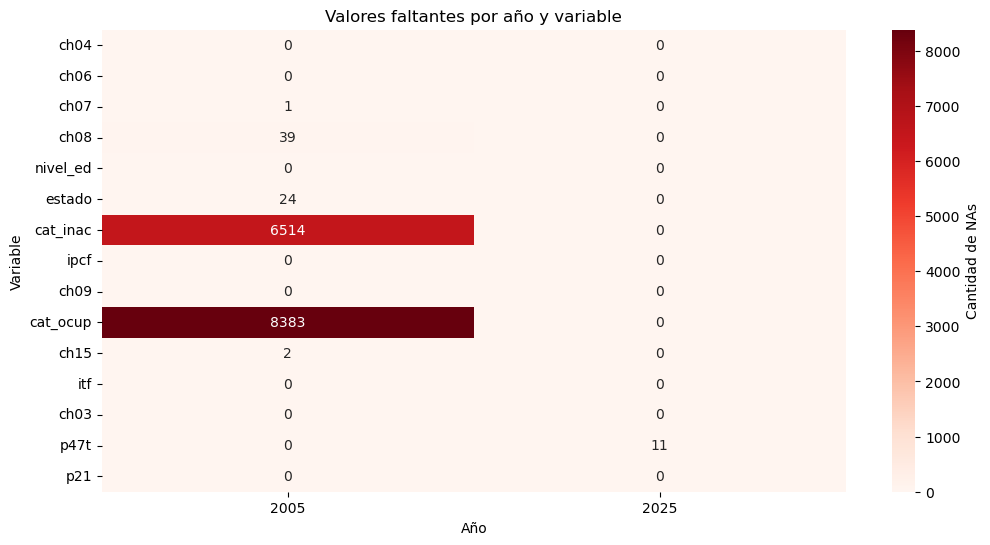

In [132]:
#HACEMOS HEATMAP

import seaborn as sns
import matplotlib.pyplot as plt

# Calcular cantidad de valores faltantes por año y variable
missing = EPH_total.groupby("anio")[variables].apply(lambda x: x.isna().sum())

# Dibujar heatmap
plt.figure(figsize=(12,6))
sns.heatmap(missing.T, annot=True, fmt="d", cmap="Reds", cbar_kws={'label': 'Cantidad de NAs'})
plt.title("Valores faltantes por año y variable")
plt.ylabel("Variable")
plt.xlabel("Año")
plt.show()

In [ ]:
#---------PARTE 2-----------------

In [ ]:
#EJERCICIO 3

Totales por sexo y año en Región Pampeana:
   anio  ch04  count
0  2005     1   6956
1  2005     2   7695
2  2025     1   6614
3  2025     2   7189


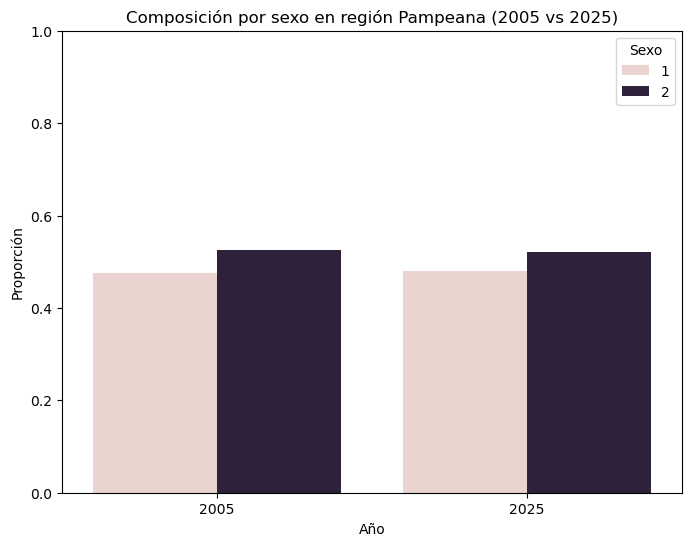

In [137]:
# --- Conteo por sexo y año ---
total_sexo_anio = EPH_total.groupby(['anio', 'ch04']).size().reset_index(name='count')
print("Totales por sexo y año en Región Pampeana:")
print(total_sexo_anio)

# --- Calcular proporciones para el gráfico ---
sexo_counts = total_sexo_anio.copy()
sexo_counts['prop'] = sexo_counts.groupby('anio')['count'].transform(lambda x: x / x.sum())

# --- Gráfico de barras ---
plt.figure(figsize=(8,6))
sns.barplot(data=sexo_counts, x='anio', y='prop', hue='ch04')

plt.title("Composición por sexo en región Pampeana (2005 vs 2025)")
plt.ylabel("Proporción")
plt.xlabel("Año")
plt.ylim(0,1)
plt.legend(title="Sexo")
plt.show()


In [ ]:
#EJERCICIO 4

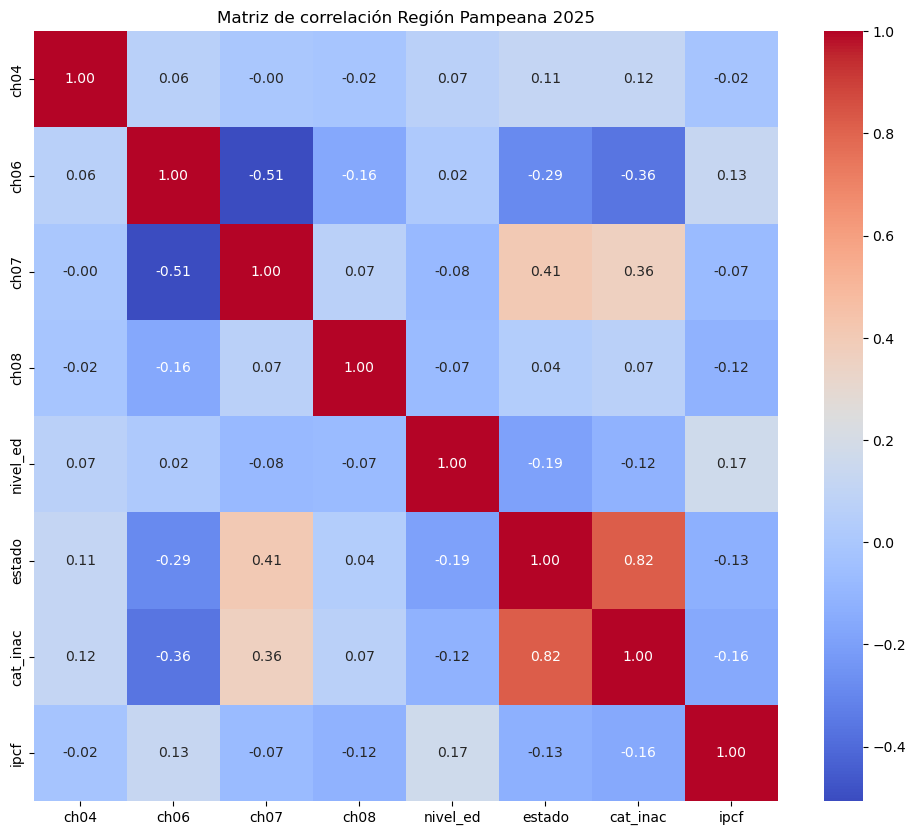

In [138]:
categoricas_2025 = ['ch04', 'ch06', 'ch07', 'ch08', 'nivel_ed', 'estado', 'cat_inac']
numericas_2025 = ['ipcf']

# Crear dummies y preparar dataframe para correlación
EPH2025_num = pd.get_dummies(EPH2025_pampeana[categoricas_2025], drop_first=True)
EPH2025_num = pd.concat([EPH2025_num, EPH2025_pampeana[numericas_2025]], axis=1)

# Calcular matriz de correlación
corr_2025 = EPH2025_num.corr()

# Graficar
plt.figure(figsize=(12,10))
sns.heatmap(corr_2025, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Matriz de correlación Región Pampeana 2025")
plt.show()


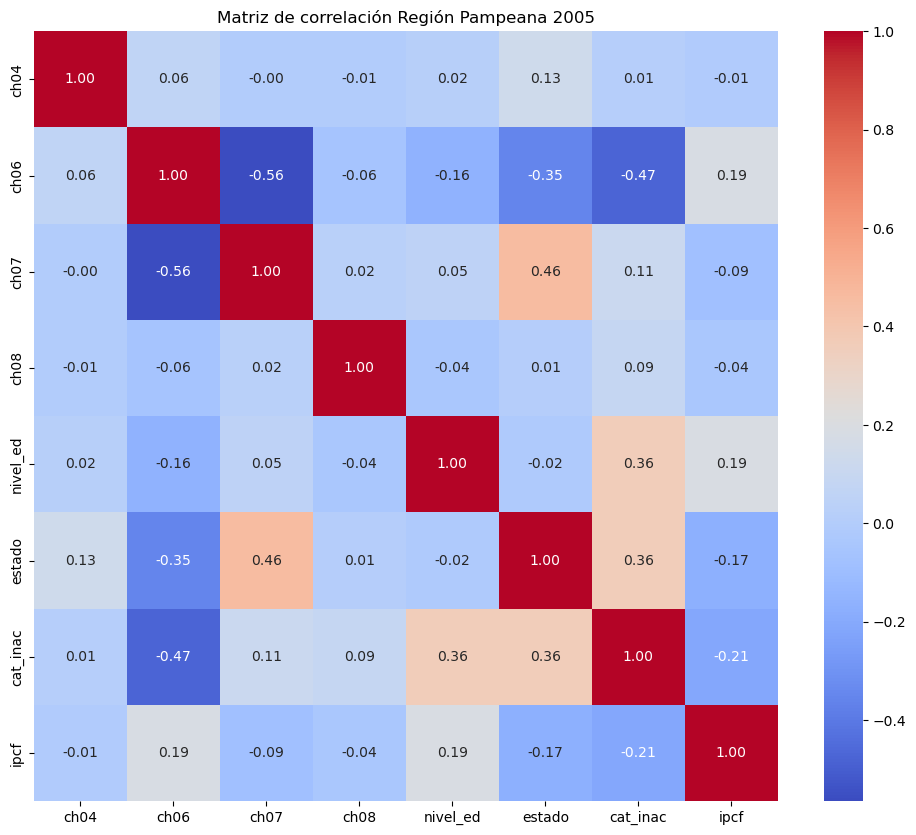

In [139]:
# Variables categóricas y numéricas disponibles en 2005
categoricas_2005 = ['ch04', 'ch06', 'ch07', 'ch08', 'nivel_ed', 'estado', 'cat_inac']
numericas_2005 = ['ipcf']

# Filtrar columnas realmente existentes
categoricas_2005 = [col for col in categoricas_2005 if col in EPH2005_pampeana.columns]
numericas_2005 = [col for col in numericas_2005 if col in EPH2005_pampeana.columns]

# Crear dummies
EPH2005_num = pd.get_dummies(EPH2005_pampeana[categoricas_2005], drop_first=True)
EPH2005_num = pd.concat([EPH2005_num, EPH2005_pampeana[numericas_2005]], axis=1)

# Calcular matriz de correlación
corr_2005 = EPH2005_num.corr()

# Graficar
plt.figure(figsize=(12,10))
sns.heatmap(corr_2005, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Matriz de correlación Región Pampeana 2005')
plt.show()

In [ ]:
#EJERCICIO 5

In [141]:
# Contar los valores faltantes en la columna de condición de actividad 'cat_ocup'
no_resp_cond_actividad = EPH_total['cat_ocup'].isna().sum()
print("Cantidad de personas que no respondieron su condición de actividad:", no_resp_cond_actividad)

# Observaciones que respondieron su ITF (mayor a 0)
respondieron = EPH_total[EPH_total['itf'] > 0].copy()

# Observaciones con ITF = 0 (no respondieron)
norespondieron = EPH_total[EPH_total['itf'] == 0].copy()

print("Número de observaciones que respondieron ITF:", respondieron.shape[0])
print("Número de observaciones que no respondieron ITF:", norespondieron.shape[0])



Cantidad de personas que no respondieron su condición de actividad: 8383
Número de observaciones que respondieron ITF: 23821
Número de observaciones que no respondieron ITF: 4633


In [ ]:
#HASTA ACA CORRÍA TODO BIEN, FIJATE BIEN LO ANTERIOR 

In [145]:
import pandas as pd

# --- 1. Crear tabla de adulto equivalente ---
data = {
    'edad': ['<1','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18-29','30-45','46-60','61-75','>75'],
    'Mujeres': [0.35,0.37,0.46,0.51,0.55,0.60,0.64,0.66,0.68,0.69,0.70,0.72,0.74,0.76,0.76,0.77,0.77,0.77,0.76,0.77,0.76,0.67,0.63],
    'Varones': [0.35,0.37,0.46,0.51,0.55,0.60,0.64,0.66,0.68,0.69,0.79,0.82,0.85,0.90,0.96,1.00,1.03,1.04,1.02,1.00,1.00,0.83,0.74]
}
adulto_equiv = pd.DataFrame(data)

# --- 2. Función para asignar adulto_equiv según sexo y edad ---
def asignar_adulto_equiv(row):
    edad = row['ch03']
    sexo = row['ch04']  # asumimos 'Varón' o 'Mujer'
    sexo_col = 'Mujeres' if sexo.lower() in ['mujer','f','0'] else 'Varones'

    if edad < 1:
        return adulto_equiv.loc[adulto_equiv['edad'] == '<1', sexo_col].values[0]
    elif edad == 1:
        return adulto_equiv.loc[adulto_equiv['edad'] == '1', sexo_col].values[0]
    elif edad == 2:
        return adulto_equiv.loc[adulto_equiv['edad'] == '2', sexo_col].values[0]
    elif edad == 3:
        return adulto_equiv.loc[adulto_equiv['edad'] == '3', sexo_col].values[0]
    elif edad == 4:
        return adulto_equiv.loc[adulto_equiv['edad'] == '4', sexo_col].values[0]
    elif edad == 5:
        return adulto_equiv.loc[adulto_equiv['edad'] == '5', sexo_col].values[0]
    elif edad == 6:
        return adulto_equiv.loc[adulto_equiv['edad'] == '6', sexo_col].values[0]
    elif edad == 7:
        return adulto_equiv.loc[adulto_equiv['edad'] == '7', sexo_col].values[0]
    elif edad == 8:
        return adulto_equiv.loc[adulto_equiv['edad'] == '8', sexo_col].values[0]
    elif edad == 9:
        return adulto_equiv.loc[adulto_equiv['edad'] == '9', sexo_col].values[0]
    elif edad == 10:
        return adulto_equiv.loc[adulto_equiv['edad'] == '10', sexo_col].values[0]
    elif edad == 11:
        return adulto_equiv.loc[adulto_equiv['edad'] == '11', sexo_col].values[0]
    elif edad == 12:
        return adulto_equiv.loc[adulto_equiv['edad'] == '12', sexo_col].values[0]
    elif edad == 13:
        return adulto_equiv.loc[adulto_equiv['edad'] == '13', sexo_col].values[0]
    elif edad == 14:
        return adulto_equiv.loc[adulto_equiv['edad'] == '14', sexo_col].values[0]
    elif edad == 15:
        return adulto_equiv.loc[adulto_equiv['edad'] == '15', sexo_col].values[0]
    elif edad == 16:
        return adulto_equiv.loc[adulto_equiv['edad'] == '16', sexo_col].values[0]
    elif edad == 17:
        return adulto_equiv.loc[adulto_equiv['edad'] == '17', sexo_col].values[0]
    elif 18 <= edad <= 29:
        return adulto_equiv.loc[adulto_equiv['edad'] == '18-29', sexo_col].values[0]
    elif 30 <= edad <= 45:
        return adulto_equiv.loc[adulto_equiv['edad'] == '30-45', sexo_col].values[0]
    elif 46 <= edad <= 60:
        return adulto_equiv.loc[adulto_equiv['edad'] == '46-60', sexo_col].values[0]
    elif 61 <= edad <= 75:
        return adulto_equiv.loc[adulto_equiv['edad'] == '61-75', sexo_col].values[0]
    elif edad > 75:
        return adulto_equiv.loc[adulto_equiv['edad'] == '>75', sexo_col].values[0]

# --- 3. Aplicar la función a la base ---
EPH_total['ch03'] = EPH_total['ch03'].astype(int)
EPH_total['adulto_equiv'] = EPH_total.apply(asignar_adulto_equiv, axis=1)

# --- 4. Sumar adulto_equiv por hogar ---
ad_equiv_hogar = EPH_total.groupby('p47t')['adulto_equiv'].sum().reset_index()
ad_equiv_hogar.rename(columns={'adulto_equiv':'ad_equiv_hogar3'}, inplace=True)
EPH_total = EPH_total.merge(ad_equiv_hogar, on='p47t', how='left')

# --- 5. Revisar resultados ---
print(EPH_total[['p47t','ch03','ch04','adulto_equiv','ad_equiv_hogar3']].head())


KeyError: "['ad_equiv_hogar3'] not in index"

In [147]:
# 1. Sumar adulto_equiv por hogar
ad_equiv_hogar = EPH_total.groupby('p47t')['adulto_equiv'].sum().reset_index()
ad_equiv_hogar.rename(columns={'adulto_equiv':'ad_equiv_hogar3'}, inplace=True)

# 2. Unir de nuevo con EPH_total
EPH_total = EPH_total.merge(ad_equiv_hogar, on='p47t', how='left')

# Filtrar hogares válidos
EPH_total_validos = EPH_total[EPH_total['p47t'] > 0].copy()

# Sumar adulto_equiv por hogar
ad_equiv_hogar = EPH_total_validos.groupby('p47t')['adulto_equiv'].sum().reset_index()
ad_equiv_hogar.rename(columns={'adulto_equiv':'ad_equiv_hogar3'}, inplace=True)

# Merge seguro con EPH_total
EPH_total = EPH_total.merge(ad_equiv_hogar, on='p47t', how='left')

# Revisar resultados
print(EPH_total[['p47t','ch03','ch04','adulto_equiv','ad_equiv_hogar3']].head())


MergeError: Passing 'suffixes' which cause duplicate columns {'ad_equiv_hogar3_x'} is not allowed.

In [150]:
'ad_equiv_hogar3' in EPH_total.columns

if 'ad_equiv_hogar3' in EPH_total.columns:
    EPH_total.drop(columns=['ad_equiv_hogar3'], inplace=True)


# Sumar adulto_equiv por hogar (solo hogares válidos)
ad_equiv_hogar = EPH_total[EPH_total['p47t'] > 0].groupby('p47t')['adulto_equiv'].sum().reset_index()
ad_equiv_hogar.rename(columns={'adulto_equiv':'ad_equiv_hogar3'}, inplace=True)

# Merge con EPH_total
EPH_total = EPH_total.merge(ad_equiv_hogar, on='p47t', how='left')

# Revisar resultados
print(EPH_total[['p47t','ch03','ch04','adulto_equiv','ad_equiv_hogar3']].head())


     p47t  ch03 ch04  adulto_equiv  ad_equiv_hogar3
0   500.0     1    1          0.37           175.79
1   340.0     2    2          0.46             7.89
2     0.0     3    1          0.51              NaN
3  1500.0     1    1          0.37            57.39
4  1900.0     2    2          0.46             7.30


In [ ]:
#EJERCICIO 7

In [152]:
# Asegurarse de que respondieron tenga ad_equiv_hogar3
respondieron = respondieron.merge(
    EPH_total[['p47t','ad_equiv_hogar3']],
    on='p47t',
    how='left'
)

# Valores de Canasta Básica Total por año
CBT = {
    2005: 205.07,
    2025: 365177
}

# Crear columna ingreso_necesario
respondieron['ingreso_necesario'] = respondieron.apply(
    lambda row: row['ad_equiv_hogar3'] * CBT[row['anio']], axis=1
)

# Revisar resultados
print(respondieron[['p47t','anio','ad_equiv_hogar3','ingreso_necesario']].head())


MemoryError: Unable to allocate 115. MiB for an array with shape (120893899,) and data type bool